In [1]:
import sys
sys.path.append('..')
import ugent

In [2]:
import pyslise
from math import cosh, exp, sin, cos, pi, sqrt

p = lambda x: 1
q = lambda x: sqrt(abs(x))
w = lambda x: 1 + x**2

sl = pyslise.SturmLiouville(p, q, w, -pi, pi)

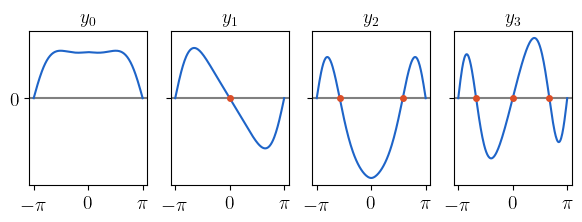

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import root_scalar

fig, axes = plt.subplots(1, 4, sharey=True, figsize=(7, 2))

roots = [[], [(-1, 1)], [(-3, 0), (0, 3)], [(-3.1, -2), (-1, 1), (2, 3.1)]]
xs = np.linspace(-pi, pi, 200)
for ax, root_locs, (i, E, f) in zip(axes, roots, sl.eigenpairsByIndex(0, len(axes), (0, 1), (0, 1))):
    ax.hlines(0, -5, 5, color="gray")
    ax.plot(xs, f(xs)[0, :], color=ugent.blauw)
    ax.set_xticks([-pi, 0, pi])
    ax.set_xticklabels(["$-\pi$", "$0$", "$\pi$"])
    ax.set_yticks([0])
    ax.set_xlim(-3.4, 3.4)
    ax.set_title(f"$y_{{{i}}}$", fontsize=14)
    for rlow, rhigh in root_locs:
        r = root_scalar(lambda x: f(x)[0], x0=rlow, x1=rhigh)
        ax.plot([r.root], [0], marker='o', color=ugent.rood, markersize=4)

plt.savefig('slp_count_roots.pdf', bbox_inches="tight")
plt.show()